# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [13]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [14]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [15]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [16]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [17]:
# env_info = env.reset(train_mode=True)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [18]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [19]:
import time
import math
import datetime
import torch                       
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline 

In [20]:
def dqn(n_episodes=2000, eps_start=.99, eps_end=0.01, eps_decay = .996, train_numb = 0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    start_time = time.time()                               # start time 
    scores = []                                            # list of scores for each episode
    scores_window = deque(maxlen=100)                      # last 100 scores
    eps = eps_start                                        # initialize epsilon

    for i_episode in range(1, n_episodes+1):               # loop by episodes
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]            # get the current state 
        score = 0                                          # reset the score counter
        done = False                                       # are we done yet?
        while not done:                                    # internal loop in the episode
            action = agent.act(state,eps)                  # next action from the agent 
            action = int(action)                           # cast to int
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # done is true if episode has finished
            agent.step(state,action,reward,next_state, done) # next learning step by state and reward
            score += reward                                # count our rewards
            state = next_state                             # update state
            if done:                                       # done ?
                break                                      # save score
        scores_window.append(score)                        # save score in the deque with 100 or less elements
        scores.append(score)
        
        eps = max(eps_end,eps_decay*eps)                   # make epsilon a bit smaller
        
        count = 0                                          # how many times we've reached 13
        for j in range(len(scores_window)):                
            if scores_window[j] >= 13:
                count+=1
                
        elapsed = datetime.timedelta(seconds = time.time()-start_time)  # elapsed time
        
        print('\rEpisode: {}, elapsed: {}, Avg.Score: {:.2f},  score {}, How many scores >= 13: {}, eps.: {:.2f}'. \
            format(i_episode, elapsed, np.mean(scores_window), score, count, eps), end="")
        
        if np.mean(scores_window) >=13:  # check completion criteria.
            print("\n terminating at episode :", i_episode, "ave reward reached +13 over 100 episodes")
            break
            
    torch.save(agent.qnetwork_local.state_dict(), 'weights_'+str(train_numb)+'.trn') # save the weights into the file 
    return scores, i_episode

fc1_units:  54 , fc2_units:  46
train_numb:  0 eps_start:  0.99
Episode: 639, elapsed: 0:14:11.673203, Avg.Score: 13.00,  score 14.0, How many scores >= 13: 53, eps.: 0.08
 terminating at episode : 639 ave reward reached +13 over 100 episodes


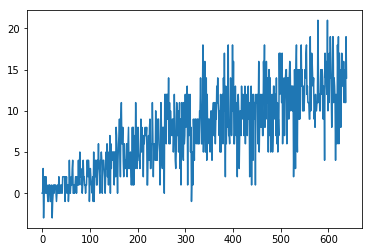


********************************************************

fc1_units:  118 , fc2_units:  118
train_numb:  1 eps_start:  0.992
Episode: 634, elapsed: 0:14:09.634947, Avg.Score: 13.01,  score 15.0, How many scores >= 13: 53, eps.: 0.08
 terminating at episode : 634 ave reward reached +13 over 100 episodes


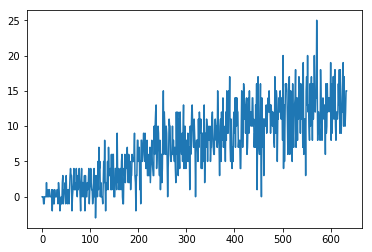


********************************************************

fc1_units:  54 , fc2_units:  46
train_numb:  2 eps_start:  0.993
Episode: 613, elapsed: 0:13:40.427706, Avg.Score: 13.00,  score 13.0, How many scores >= 13: 59, eps.: 0.09
 terminating at episode : 613 ave reward reached +13 over 100 episodes


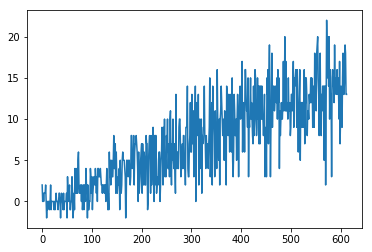


********************************************************

fc1_units:  54 , fc2_units:  46
train_numb:  3 eps_start:  0.988
Episode: 629, elapsed: 0:14:01.435002, Avg.Score: 13.00,  score 19.0, How many scores >= 13: 58, eps.: 0.08
 terminating at episode : 629 ave reward reached +13 over 100 episodes


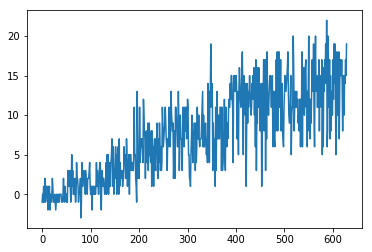


********************************************************

fc1_units:  54 , fc2_units:  54
train_numb:  4 eps_start:  0.991
Episode: 588, elapsed: 0:13:10.050657, Avg.Score: 13.00,  score 17.0, How many scores >= 13: 57, eps.: 0.09
 terminating at episode : 588 ave reward reached +13 over 100 episodes


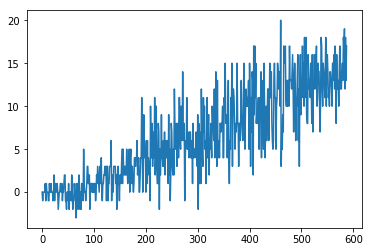


********************************************************

fc1_units:  54 , fc2_units:  46
train_numb:  5 eps_start:  0.992
Episode: 583, elapsed: 0:13:04.717450, Avg.Score: 13.05,  score 18.0, How many scores >= 13: 55, eps.: 0.10
 terminating at episode : 583 ave reward reached +13 over 100 episodes


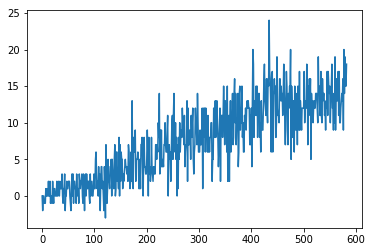


********************************************************

fc1_units:  118 , fc2_units:  110
train_numb:  6 eps_start:  0.988
Episode: 634, elapsed: 0:14:14.761383, Avg.Score: 13.05,  score 21.0, How many scores >= 13: 60, eps.: 0.08
 terminating at episode : 634 ave reward reached +13 over 100 episodes


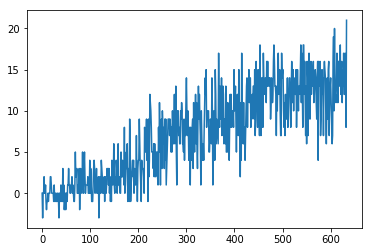


********************************************************

fc1_units:  86 , fc2_units:  78
train_numb:  7 eps_start:  0.991
Episode: 534, elapsed: 0:11:59.747946, Avg.Score: 13.03,  score 15.0, How many scores >= 13: 57, eps.: 0.12
 terminating at episode : 534 ave reward reached +13 over 100 episodes


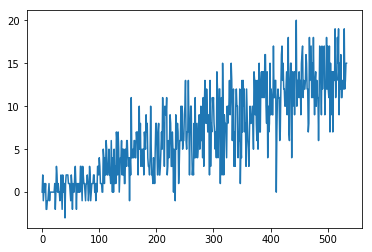


********************************************************



In [21]:
import random

list_fc1_units = []
list_fc2_units = []
list_eps_start = []
list_episodes  = []

numb_of_trains = 8 # 10 
for i in range(0, numb_of_trains):
    #generate random number of nodes
    fc1_nodes = random.randrange(54, 128, 32) # possible numbers : 48, 64, 80, 96, 112, 128 ( > 37)
    fc2_nodes = random.randrange(fc1_nodes - 8 , fc1_nodes + 8, 8)   # possible numbers  with step 8 

    #randomly initialize epsilon
    epsilon_start = random.randrange(988, 995, 1)/1000.
    
    print('fc1_units: ', fc1_nodes, ', fc2_units: ', fc2_nodes)
    print('train_numb: ', i, 'eps_start: ',epsilon_start)
    agent = Agent(state_size=37, action_size=4, seed=1, fc1_units=fc1_nodes, fc2_units=fc2_nodes)
    scores, episodes = dqn(n_episodes = 2000, eps_start = epsilon_start, train_numb=i)  # train with current params
    list_fc1_units.append(fc1_nodes)
    list_fc2_units.append(fc2_nodes)
    list_eps_start.append(epsilon_start)
    list_episodes.append(episodes)
    plt.plot(scores)
    plt.show()
    print("\n********************************************************\n")


In [22]:
def checkWeights(env, train_n, test, fc1_n, fc2_n, eps_s, episodes):
    agent = Agent(state_size=37, action_size=4, seed=17, fc1_units=fc1_n, fc2_units=fc2_n)  
    file_weights = 'weights_'+str(train_n)+'.trn'
    agent.qnetwork_local.load_state_dict(torch.load(file_weights))

    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state,.05)                  # select an action
        action = int(action)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    
    print('Train: {}, Test: {}, Episode: {}, fc1_units: {}, fc2_units: {}, eps_start: {}, Score: {}'\
          .format(train_n, test, episodes, fc1_n, fc2_n, eps_s, score))
    return score

for i in range(0, numb_of_trains):
    fc1_nodes = list_fc1_units[i]
    fc2_nodes = list_fc2_units[i]
    eps_start = list_eps_start[i]
    episodes  = list_episodes[i]
    list_scores = []
    for test in range(0,6):        
        score = checkWeights(env=env, train_n=i, test=test, fc1_n=fc1_nodes, fc2_n=fc2_nodes, eps_s=eps_start,episodes=episodes)
        list_scores.append(score)
    avg_score =  np.mean(list_scores)
    print('       Average Score: ', avg_score)
    print('=========================================================')

Train: 0, Test: 0, Episode: 639, fc1_units: 54, fc2_units: 46, eps_start: 0.99, Score: 8.0
Train: 0, Test: 1, Episode: 639, fc1_units: 54, fc2_units: 46, eps_start: 0.99, Score: 7.0
Train: 0, Test: 2, Episode: 639, fc1_units: 54, fc2_units: 46, eps_start: 0.99, Score: 6.0
Train: 0, Test: 3, Episode: 639, fc1_units: 54, fc2_units: 46, eps_start: 0.99, Score: 12.0
Train: 0, Test: 4, Episode: 639, fc1_units: 54, fc2_units: 46, eps_start: 0.99, Score: 10.0
Train: 0, Test: 5, Episode: 639, fc1_units: 54, fc2_units: 46, eps_start: 0.99, Score: 13.0
       Average Score:  9.33333333333
Train: 1, Test: 0, Episode: 634, fc1_units: 118, fc2_units: 118, eps_start: 0.992, Score: 12.0
Train: 1, Test: 1, Episode: 634, fc1_units: 118, fc2_units: 118, eps_start: 0.992, Score: 18.0
Train: 1, Test: 2, Episode: 634, fc1_units: 118, fc2_units: 118, eps_start: 0.992, Score: 14.0
Train: 1, Test: 3, Episode: 634, fc1_units: 118, fc2_units: 118, eps_start: 0.992, Score: 15.0
Train: 1, Test: 4, Episode: 634, f

In [23]:
env.close()